In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns 
import re
 
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [24]:
import sklearn

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.inspection import permutation_importance

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter, ConstantKernel
from sklearn.gaussian_process.kernels import GenericKernelMixin

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  

from sklearn.pipeline import make_pipeline

from sklearn.base import clone

In [25]:
def get_RF_feature_importance():
    features= X
    feature_list = list(features.columns)
    rf = RandomForestRegressor(n_estimators= 15, random_state=1)
    rf.fit(X , Y)

    # Get numerical feature importances
    importances = list(rf.feature_importances_)      
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, 
                           importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [26]:
data = pd.read_csv('Combined_all_3rd.csv', encoding='cp1252')  

In [27]:
data.columns.values

array(['Name', 'Coef_a', 'Coef_b', 'Coef_c', 'Coef_d', 'A_site', 'B_site',
       'X_site', 'Spacegroup', 'Ehull', 'BulkModulus', 'Energy', 'ZPE',
       's_A', 's_B', 's_X', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X',
       'mean_X2X', 'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh',
       'TF', 'OF', 'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G',
       'X_G', 'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII',
       'A_EA', 'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA',
       'X_ChiA', 'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc',
       'A_Ra', 'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP',
       'X_BP', 'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf',
       'X_Hf', 'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa',
       'A_CvM', 'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [28]:
data.drop(['Name', 'A_site', 'B_site', 'X_site', 'Spacegroup', 'Ehull','BulkModulus', 'Energy','s_A','s_B','s_X','ZPE','Coef_b', 'Coef_c', 'Coef_d'], axis=1, inplace = True)

In [29]:
data.fillna(0, inplace= True)

In [30]:
d=data.copy()
d.columns.values

array(['Coef_a', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X',
       'mean_X2X', 'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh',
       'TF', 'OF', 'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G',
       'X_G', 'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII',
       'A_EA', 'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA',
       'X_ChiA', 'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc',
       'A_Ra', 'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP',
       'X_BP', 'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf',
       'X_Hf', 'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa',
       'A_CvM', 'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [31]:
columns = list(d.columns.values)

In [32]:
data_std=d.copy()
scaler=MinMaxScaler()
scaler.fit(np.array(data['Coef_a']).reshape(-1, 1))
data_zpe_std= scaler.transform(np.array(data['Coef_a']).reshape(-1, 1))
data_std[columns]= MinMaxScaler().fit_transform(d[columns])
Y = data_std['Coef_a'] 
X = data_std.drop(['Coef_a'], axis=1)

In [33]:
corrmat = X.corr()
top_corr_features = corrmat.index
correlated_features = set()

In [34]:
for i in range(len(X.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.9:
            colname = corrmat.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)

{'X_MendeleevNo', 'X_ChiA', 'X_Hv', 'X_Ra', 'X_CvM', 'X_M', 'A_Ra', 'X_B', 'A_Rc', 'X_IEII', 'X_Rc', 'X_BP', 'A_MendeleevNo', 'B_BP', 'A_Hv', 'A_Hf', 'A_MV', 'X_MP', 'A_M', 'A_BP', 'X_Hf', 'B_M', 'B_Hv'}


In [35]:
data_std.drop(labels=correlated_features, axis=1, inplace=True)
data_std.shape

(80, 51)

In [36]:
# split into train and test
df_train, df_test = train_test_split(data_std, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 50)
df_train.reset_index(inplace = True)
df_test.reset_index(inplace = True)
df_train=df_train.drop('index',axis=1)
df_test=df_test.drop('index',axis=1)
# divide into X_train, y_train, X_test, y_test
Y = df_train.pop('Coef_a')
X = df_train

Y_test = df_test.pop('Coef_a')
X_test = df_test

In [37]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

     Feature       Score
1   mean_A2B  109.296724
25      X_EA   73.368669
14       X_Z   66.718735
4   mean_X2X   56.945060
32    X_Rvdw   56.130242
30    A_Rvdw   51.699207
2   mean_A2X   40.526215
18     A_IEI   32.506577
9      E_coh   30.740923
29    A_ChiA   16.249435
6    std_A2X   15.249756
26    A_ChiP   14.642045
23      A_EA   13.518905
41      B_Hf   13.440569
44   X_Kappa   12.439648
36      B_MP   11.182324
35      A_MP   10.204076
42   A_Kappa    8.683247
7    std_B2X    8.580932
12       A_Z    8.474870
43   B_Kappa    8.031022
13       B_Z    6.255140
17       X_G    6.249672
45     A_CvM    5.656104
15       A_G    5.063472
11        OF    4.732281
34      B_Ra    4.706026
20     X_IEI    4.443059
47       A_B    4.300002
5    std_A2B    3.779552


In [38]:
get_RF_feature_importance()

Variable: mean_X2X             Importance: 0.44
Variable: mean_A2B             Importance: 0.17
Variable: X_Z                  Importance: 0.11
Variable: E_coh                Importance: 0.08
Variable: X_IEI                Importance: 0.02
Variable: A_ChiA               Importance: 0.02
Variable: density              Importance: 0.01
Variable: TF                   Importance: 0.01
Variable: B_Z                  Importance: 0.01
Variable: X_G                  Importance: 0.01
Variable: B_IEII               Importance: 0.01
Variable: X_EA                 Importance: 0.01
Variable: X_ChiP               Importance: 0.01
Variable: A_Rvdw               Importance: 0.01
Variable: B_Rho                Importance: 0.01
Variable: B_Hf                 Importance: 0.01
Variable: B_CvM                Importance: 0.01
Variable: B_MendeleevNo        Importance: 0.01
Variable: mean_A2X             Importance: 0.0
Variable: mean_B2X             Importance: 0.0
Variable: std_A2B              Importance:

In [39]:
featureScores.nlargest(51,'Score')['Feature'].values

array(['mean_A2B', 'X_EA', 'X_Z', 'mean_X2X', 'X_Rvdw', 'A_Rvdw',
       'mean_A2X', 'A_IEI', 'E_coh', 'A_ChiA', 'std_A2X', 'A_ChiP',
       'A_EA', 'B_Hf', 'X_Kappa', 'B_MP', 'A_MP', 'A_Kappa', 'std_B2X',
       'A_Z', 'B_Kappa', 'B_Z', 'X_G', 'A_CvM', 'A_G', 'OF', 'B_Ra',
       'X_IEI', 'A_B', 'std_A2B', 'B_EA', 'B_Rho', 'X_MV', 'density',
       'B_IEI', 'B_ChiP', 'B_CvM', 'std_X2X', 'A_Rho', 'B_MV', 'X_ChiP',
       'B_MendeleevNo', 'TF', 'B_IEII', 'B_G', 'B_Rvdw', 'A_IEII', 'B_Rc',
       'mean_B2X', 'B_B'], dtype=object)

In [40]:
X=X[featureScores.nlargest(51,'Score')['Feature'].values]
X_test=X_test[featureScores.nlargest(51,'Score')['Feature'].values]

GPR-5:  0.9380732107853211
RMSE:  0.05872418739360149
RMSE unscaled:  7.133946283883212e-09
----------------------------------------
[[5.97285312e-08]
 [8.89432730e-08]
 [1.35615985e-07]
 [4.46713554e-08]
 [1.03150689e-07]
 [7.05937166e-08]
 [8.97568617e-08]
 [5.67447135e-08]
 [3.66520222e-08]
 [1.03248239e-07]
 [6.10530521e-08]
 [7.71354324e-08]
 [5.66365897e-08]
 [9.06840477e-08]
 [1.26198922e-07]
 [4.03804114e-08]]
[[6.15762897e-08]
 [9.70287030e-08]
 [1.40050351e-07]
 [4.28394490e-08]
 [1.06536143e-07]
 [7.39440695e-08]
 [9.40801071e-08]
 [5.85538436e-08]
 [5.54334982e-08]
 [9.13119460e-08]
 [6.19067824e-08]
 [8.15742360e-08]
 [5.68133019e-08]
 [9.90123222e-08]
 [1.17486380e-07]
 [4.44893105e-08]]


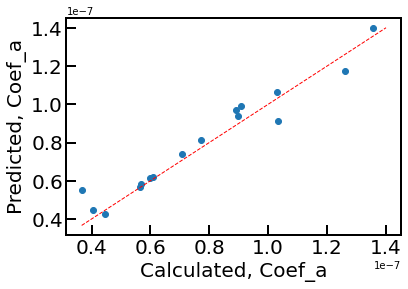

In [41]:
#model = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3))+ 
#                                WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),alpha=0.0)
model = GaussianProcessRegressor(kernel=1.0 * RationalQuadratic(length_scale=1.0, alpha=0.01))
model.fit(X,Y)
predicted = model.predict(X_test)
r2=sklearn.metrics.r2_score(Y_test, predicted)
Y_unscaled = scaler.inverse_transform(np.array(Y_test).reshape(-1,1))
predicted_unscaled = scaler.inverse_transform(np.array(predicted).reshape(-1,1))
err=np.sqrt(mean_squared_error(Y_test,predicted))
err_unscaled=np.sqrt(mean_squared_error(Y_unscaled,predicted_unscaled))
print("GPR-5: ",r2)
print("RMSE: ",err)
print("RMSE unscaled: ",err_unscaled)
print("----------------------------------------")
fig, ax = plt.subplots()
ax.scatter(Y_unscaled, predicted_unscaled)
print(Y_unscaled)
print(predicted_unscaled)
ax.plot([Y_unscaled.min(), predicted_unscaled.max()], [Y_unscaled.min(), predicted_unscaled.max()], 'r--', lw=1)
#for i in range(len(Y_test)):
#    plt.annotate(text[i], (Y_test[i], predicted[i]))
ax.set_xlabel("Calculated, Coef_a",fontsize= 20)
ax.set_ylabel("Predicted, Coef_a",fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(direction='in', length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#plt.savefig('kl_train.eps', format='eps', bbox_inches='tight',pad_inches = 0)
plt.show()

GPR-2:  0.9999999999999999
RMSE:  1.9799556861883715e-09
RMSE unscaled:  2.4052946730363707e-16
----------------------------------------
[[9.18423500e-08]
 [5.96433360e-08]
 [6.96472097e-08]
 [8.73545372e-08]
 [6.36399270e-08]
 [6.55162995e-08]
 [9.37259556e-08]
 [1.12937348e-07]
 [6.53675873e-08]
 [5.92772658e-08]
 [5.04066537e-08]
 [7.14007207e-08]
 [7.27227546e-08]
 [1.36767297e-07]
 [6.84621491e-08]
 [1.20926531e-07]
 [7.06058011e-08]
 [1.24745933e-07]
 [8.88828543e-08]
 [6.40306211e-08]
 [3.63271943e-08]
 [9.79839600e-08]
 [6.48691027e-08]
 [8.70294956e-08]
 [8.97048263e-08]
 [9.96997256e-08]
 [1.55514267e-07]
 [1.30637708e-07]
 [6.96157068e-08]
 [5.73160952e-08]
 [3.40320196e-08]
 [4.43249198e-08]
 [1.21581785e-07]
 [9.35018208e-08]
 [6.61867860e-08]
 [5.08485053e-08]
 [8.06379934e-08]
 [1.35678832e-07]
 [1.32945360e-07]
 [9.31613372e-08]
 [7.40122036e-08]
 [5.31711811e-08]
 [1.27846125e-07]
 [6.19287781e-08]
 [5.87606307e-08]
 [6.66175235e-08]
 [1.08670340e-07]
 [3.95093905e-08]

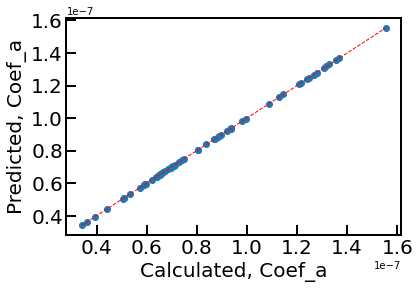

In [42]:
predicted = model.predict(X)
r2=sklearn.metrics.r2_score(Y, predicted)
Y_unscaled = scaler.inverse_transform(np.array(Y).reshape(-1,1))
predicted_unscaled = scaler.inverse_transform(np.array(predicted).reshape(-1,1))
err=np.sqrt(mean_squared_error(Y,predicted))
err_unscaled=np.sqrt(mean_squared_error(Y_unscaled,predicted_unscaled))
print("GPR-2: ",r2)
print("RMSE: ",err)
print("RMSE unscaled: ",err_unscaled)
print("----------------------------------------")
fig, ax = plt.subplots()
ax.scatter(Y_unscaled, predicted_unscaled)
print(Y_unscaled)
print(predicted_unscaled)
ax.plot([Y_unscaled.min(), predicted_unscaled.max()], [Y_unscaled.min(), predicted_unscaled.max()], 'r--', lw=1)
#for i in range(len(Y_test)):
#    plt.annotate(text[i], (Y_test[i], predicted[i]))
ax.set_xlabel("Calculated, Coef_a",fontsize= 20)
ax.set_ylabel("Predicted, Coef_a",fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(direction='in', length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#plt.savefig('kl_train.eps', format='eps', bbox_inches='tight',pad_inches = 0)
plt.show()

Feature: 0, Score: 0.00078
Feature: 1, Score: 0.00389
Feature: 2, Score: 0.00068
Feature: 3, Score: 0.00105
Feature: 4, Score: 0.00120
Feature: 5, Score: 0.00155
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.00007
Feature: 9, Score: 0.00040
Feature: 10, Score: 0.00149
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.00032
Feature: 13, Score: 0.00043
Feature: 14, Score: 0.00055
Feature: 15, Score: 0.00290
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00015
Feature: 19, Score: 0.00040
Feature: 20, Score: 0.00040
Feature: 21, Score: 0.00167
Feature: 22, Score: 0.00128
Feature: 23, Score: 0.00033
Feature: 24, Score: 0.00019
Feature: 25, Score: 0.00026
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00048
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00035
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00016
Feature: 32, Score: 0.00145
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.00017
Feature: 35, Score: 0.00011
Fe

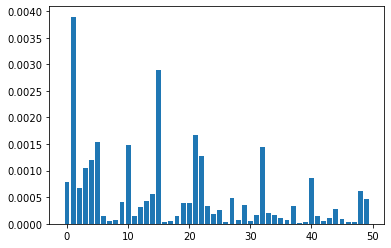

In [43]:
# fit the model
feature_scores=[]
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    feature_scores.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
featureNames = X.columns
dfscores = pd.DataFrame(feature_scores)
dfcolumns = pd.DataFrame(featureNames)
#concat two dataframes for better visualization 
featureImportance = pd.concat([dfcolumns,dfscores],axis=1)
featureImportance.columns = ['Feature','Score']  #naming the dataframe columns
print(featureImportance.nlargest(10,'Score'))  #print 10 best features

     Feature     Score
1       X_EA  0.003894
15      B_MP  0.002899
21       B_Z  0.001667
5     A_Rvdw  0.001545
10   std_A2X  0.001491
32      X_MV  0.001451
22       X_G  0.001280
4     X_Rvdw  0.001198
3   mean_X2X  0.001054
40    X_ChiP  0.000860


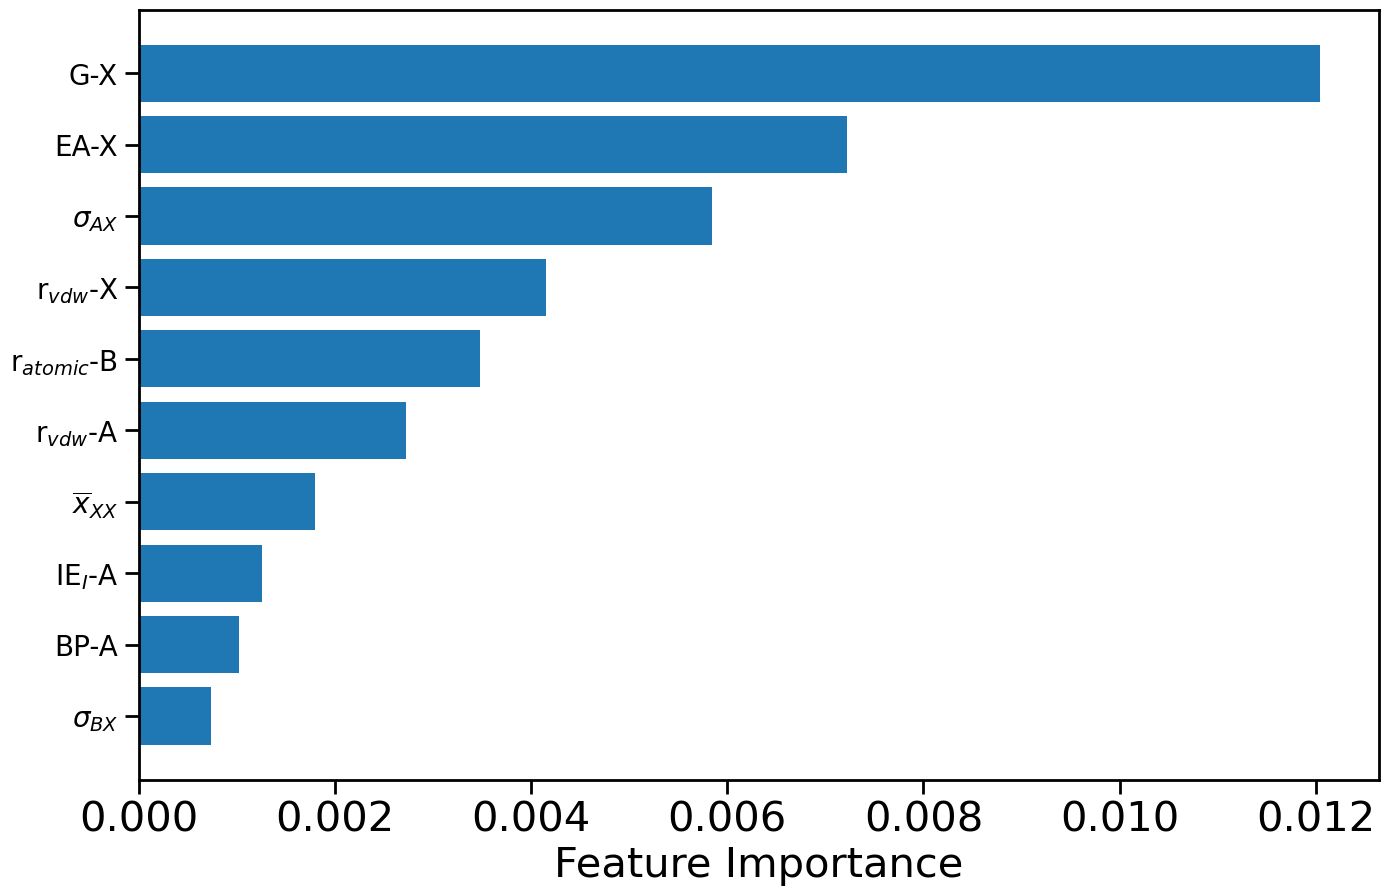

In [23]:
features = featureImportance.nlargest(10,'Score')['Feature']
features_formatted = ["G-X","EA-X","$\sigma_{AX}$","r$_{vdw}$-X","r$_{atomic}$-B",
                      "r$_{vdw}$-A","$\overline{x}_{XX}$","IE$_{I}$-A","BP-A","$\sigma_{BX}$"]
Score = featureImportance.nlargest(10,'Score')['Score']
# Figure Size
plt.rcdefaults()
fig, ax = plt.subplots(figsize =(16, 10))

#y_pos = np.arange(len(features))
importance = Score
ax.barh(features, importance, align='center')

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

# Remove x, y Ticks
#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')

ax.tick_params(direction='out', length=10, width=2)


# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
ax.set_yticklabels(features_formatted, fontsize= 20)
plt.xticks(fontsize=30)
#ax.set_xticklabels(Score, fontsize= 20)
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#        linestyle ='-.', linewidth = 0.5,
 #       alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
#for i in ax.patches:
 #   plt.text(i.get_width()+0.2, i.get_y()+0.5,
 #            str(round((i.get_width()), 2)),
#             fontsize = 15, fontweight ='bold',
#             color ='black') 
 
# Add Plot Title
#ax.set_title('Top 10 features',loc ='center', fontsize = 30)
#plot save
ax.set_xlabel('Feature Importance', fontsize = 30)
plt.savefig('imp.png', format='png',dpi=350)
# Show Plot
plt.show()